In [18]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
data = pd.read_csv("../data/raw/sisfall/SA01/F08_SA01_R01.txt", header=None)
data.columns = ['ax_1', 'ay_1', 'az_1', 'gx', 'gy', 'gz', 'ax_2', 'ay_2', 'az_2']
# Strip trailing ';' (and any trailing spaces) from the last column
data.iloc[:, -1] = (
    data.iloc[:, -1]
      .astype(str)
      .str.replace(r';\s*$', '', regex=True)
)

data['az_2'] = pd.to_numeric(data['az_2'], errors='coerce')

In [60]:
data.dtypes

ax_1    int64
ay_1    int64
az_1    int64
gx      int64
gy      int64
gz      int64
ax_2    int64
ay_2    int64
az_2    int64
dtype: object

In [61]:
data.head()


,ax_1,ay_1,az_1,gx,gy,gz,ax_2,ay_2,az_2
0,3,-259,-50,-62,19,-7,-57,-999,-43
1,3,-258,-54,-65,20,-7,-56,-999,-47
2,5,-258,-55,-67,21,-9,-57,-995,-45
3,6,-259,-49,-70,22,-8,-56,-997,-43
4,5,-261,-51,-70,21,-8,-57,-997,-40


In [69]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ax_1,3000.0,-135.770333,132.934338,-1720.000000,-227.00000,-225.000000,5.000000,51.000000
ay_1,3000.0,-56.968000,148.940474,-278.000000,-259.00000,54.000000,60.000000,275.000000
az_1,3000.0,-106.349667,58.969822,-630.000000,-121.00000,-116.000000,-54.000000,53.000000
gx,3000.0,-116.685333,298.484151,-1683.000000,-53.00000,-41.000000,-33.000000,1438.000000
gy,3000.0,-55.459000,467.655680,-4786.000000,9.00000,18.000000,29.000000,489.000000
gz,3000.0,-17.541333,355.381259,-1065.000000,-14.00000,-5.000000,2.000000,5257.000000
ax_2,3000.0,-610.486667,517.196665,-7011.000000,-967.00000,-956.000000,-57.000000,139.000000
ay_2,3000.0,-204.917667,576.831663,-1033.000000,-994.00000,226.000000,247.000000,1070.000000
az_2,3000.0,-254.847333,235.951942,-2328.000000,-305.00000,-293.000000,-51.000000,378.000000
smv,3000.0,249.271594,623.648900,5.744563,43.51149,49.613506,75.836992,6150.115853


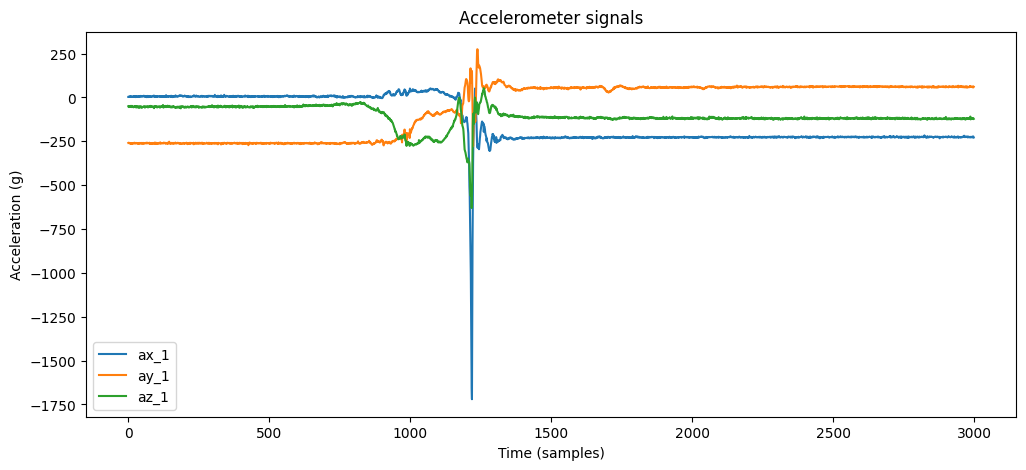

In [68]:
plt.figure(figsize=(12, 5))
plt.plot(data['ax_1'], label='ax_1')
plt.plot(data['ay_1'], label='ay_1')
plt.plot(data['az_1'], label='az_1')
# plt.plot(data['gx'], label='gx')
# plt.plot(data['gy'], label='gy')
# plt.plot(data['gz'], label='gz')
plt.legend(); plt.title('Accelerometer signals')
plt.xlabel('Time (samples)'); plt.ylabel('Acceleration (g)')
plt.show()


<Axes: title={'center': 'Signal Magnitude Vector'}>

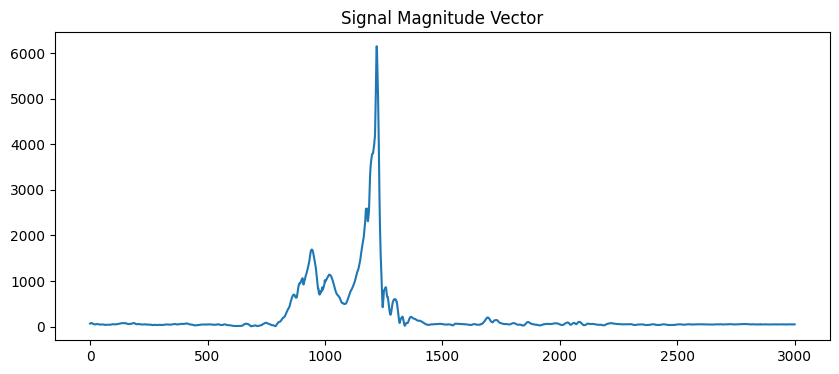

In [66]:
# data['smv'] = np.sqrt(data['ax_1']**2 + data['ay_1']**2 + data['az_1']**2)
data['smv'] = np.sqrt(data['gx']**2 + data['gy']**2 + data['gz']**2)
data['smv'].plot(figsize=(10,4), title='Signal Magnitude Vector')


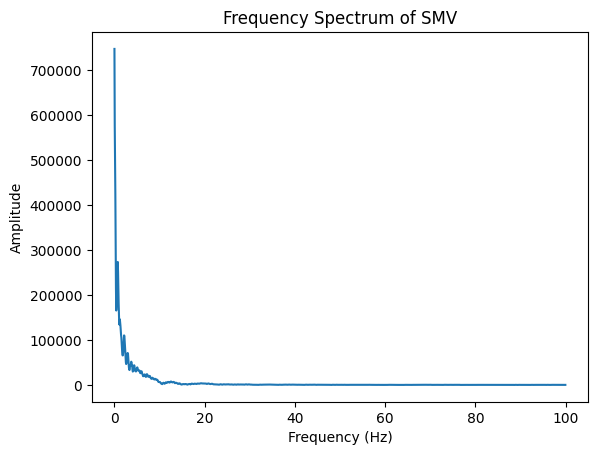

In [67]:
from scipy.fft import fft, fftfreq

N = len(data)
yf = fft(data['smv'])
xf = fftfreq(N, 1/200)  # 200 Hz sampling

plt.plot(xf[:N//2], np.abs(yf[:N//2]))
plt.title('Frequency Spectrum of SMV')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()
